In [8]:
import pandas as pd
import requests
import random
import time

from urllib3.util.retry import Retry
from requests.adapters import HTTPAdapter
from bs4 import BeautifulSoup

In [9]:
base_url = "https://www.google.com/search?sca_esv=6416c49529b0d5b1&rlz=1C1JZAP_enCA1020CA1020&tbs=lrf:!1m4!1u3!2m2!3m1!1e1!1m4!1u2!2m2!2m1!1e1!1m4!1u1!2m2!1m1!1e1!1m4!1u1!2m2!1m1!1e2!2m1!1e2!2m1!1e1!2m1!1e3!2m4!1e17!4m2!17m1!1e2!3sIAE,lf:1,lf_ui:9&tbm=lcl&sxsrf=ACQVn0-PJRd1dIKsjbpjBRNsVEcmEvupJw:1709589255998&q=indian%20restaurants%20in%20ontario&rflfq=1&num=10&sa=X&ved=2ahUKEwji8MKizNuEAxVxv4kEHV_8AVgQjGp6BAgZEAE&biw=1366&bih=679&dpr=1&rlfi=hd:;si:&rlst=f#lkt=LocalPoiReviews&rlfi=hd:;si:14844387458940842267,l,Ch1pbmRpYW4gcmVzdGF1cmFudHMgaW4gb250YXJpb0ip1aqc5oCAgAhaLxAAEAEYABgBIh1pbmRpYW4gcmVzdGF1cmFudHMgaW4gb250YXJpbyoGCAMQABABkgERaW5kaWFuX3Jlc3RhdXJhbnSaASNDaFpEU1VoTk1HOW5TMFZKUTBGblNVTktOSFZZVGt4QkVBRaoBaAoJL20vMDFoNXEwEAEqFiISaW5kaWFuIHJlc3RhdXJhbnRzKAAyHhABIhrJ051nabFrGz7Xu2WRsGEAN4KxJfAavOP_czIhEAIiHWluZGlhbiByZXN0YXVyYW50cyBpbiBvbnRhcmlv,y,adTp2qGOfes;mv:[[44.49120257776002,-77.99429943574218],[43.46742077446061,-79.12863781464843]];start:180&topic=mid:/m/02mn0l"

In [10]:
session = requests.Session()
retries = Retry(total=5, backoff_factor=1, status_forcelist=[ 500, 502, 503, 504 ])
session.mount('http://', HTTPAdapter(max_retries=retries))
session.mount('https://', HTTPAdapter(max_retries=retries))

In [11]:
def request_delay():
    delay = random.randint(30, 60)
    time.sleep(delay)

In [12]:
pages_to_scrape = 100 # defining the number of pages to be scraped
# For loop to loop through all the pages defined above

# for i in range(1, pages_to_scrape+1):
request_delay()

# declaring varibale for url of the page to get through
url = base_url


# using seseion's get funtion to get the response of that website 
response = session.get(url)
# soup object to hold the content of te site
soup = BeautifulSoup(response.content, "html.parser")

In [13]:
response

<Response [200]>

<!DOCTYPE html>
<html lang="en-CA"><head><meta charset="utf-8"/><meta content="Au/rO0LZ4O4v4w/X5EVviSE5R8rYeBZLlFQ/bnO7UvokjKTjbgbg6arj/oq4lRJHk7nI/NOlRetOK+siM03uXAsAAABueyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jYTo0NDMiLCJmZWF0dXJlIjoiTG9uZ0FuaW1hdGlvbkZyYW1lVGltaW5nIiwiZXhwaXJ5IjoxNzA5NjgzMTk5LCJpc1N1YmRvbWFpbiI6dHJ1ZX0=" http-equiv="origin-trial"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>indian restaurants in ontario - Google Search</title><script nonce="BXVpe85wBgYePcDKeJVLOg">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.pre
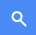

In [7]:
soup

In [13]:
import requests
from bs4 import BeautifulSoup

def scrape_google_reviews(location):
    url = f"https://www.google.com/maps/search/indian+restaurants+in+{location},+Ontario/"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        print(soup)
        reviews = soup.find_all("div", class_="section-review-content")
        print(reviews)
        for review in reviews:
            reviewer_name = review.find("div", class_="section-review-title").text.strip()
            review_text = review.find("span", class_="section-review-text").text.strip()
            print(f"Reviewer: {reviewer_name}\nReview: {review_text}\n")
    else:
        print("Failed to retrieve data")



In [14]:
# Example usage
scrape_google_reviews("Toronto")

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/Place" lang="en-CA"> <head> <link as="script" href="/maps/_/js/k=maps.m.en.fQoWLo_3qtc.2019.O/m=sc2,per,mo,lp,ep,ti,ds,stx,dwi,enr,pwd,dw,plm,log,b/am=BgChAQg/rt=j/d=1/rs=ACT90oEAsEFveD9pOQLb3pFXilWB5IsOhQ?wli=m.TQt8XugHg8U.loadSv.O%3A%3Bm.sYOK2pdnWng.mapcore.O%3A%3B" nonce="UwDqZTF4o5OlGrF0w4i8eA" rel="preload" type="application/javascript"/> <link href="/maps/preview/opensearch.xml?hl=en" rel="search" title="Google Maps" type="application/opensearchdescription+xml"/> <title>  Google Maps  </title> <meta content=" Find local businesses, view maps and get driving directions in Google Maps. " name="Description"/> <meta content="Anm+hhtuh7NJguqSnXHEAIqqMaV+GXCks8WYXHJKF7l6AeYMj+wO+fi9OdDqFnJTg9t0492DykVxx4jpvFbxnA8AAABseyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb206NDQzIiwiZmVhdHVyZSI6IlByaXZhY3lTYW5kYm94QWRzQVBJcyIsImV4cGlyeSI6MTY5NTE2Nzk5OSwiaXNTdWJkb21haW4iOnRydWV9" http-equiv="origin-trial"/> <meta content="initial-scale=1.0, ma

In [12]:
import pandas as pd
import numpy as np 


In [13]:
reviews = pd.read_csv('../recipe+reviews+and+user+feedback+dataset/RecipeandUserFeedbackDataset.csv')

In [14]:
reviews

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,1622717977,0,0,0,5,100,This Strawberry Cake has been a family favorit...
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,1613036720,0,0,0,5,100,<p>I received endless compliments on this cake...
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,1622717844,0,0,0,5,100,This cake was delicious and so moist! I didn&#...
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,1622717233,0,0,0,5,100,I just made this too. It is wonderful. As fo...


In [15]:
reviews['text']

0        I tweaked it a little, removed onions because ...
1        Bush used to have a white chili bean and it ma...
2        I have a very complicated white chicken chili ...
3        In your introduction, you mentioned cream chee...
4        Wonderful! I made this for a &#34;Chili/Stew&#...
                               ...                        
18177    This Strawberry Cake has been a family favorit...
18178    <p>I received endless compliments on this cake...
18179    This cake was delicious and so moist! I didn&#...
18180    I just made this too.  It is wonderful.  As fo...
18181    OMG, you must make this cake. I made it for my...
Name: text, Length: 18182, dtype: object

In [17]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download NLTK resources
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Sample reviews
reviews = reviews['text']
# Create lists to store review and sentiment data
review_texts = []
positive_scores = []
negative_scores = []
neutral_scores = []
compound_scores = []

# Calculate sentiment for each review and store the data
for review in reviews:
    sentiment_scores = sid.polarity_scores(review)
    review_texts.append(review)
    positive_scores.append(sentiment_scores['pos'])
    negative_scores.append(sentiment_scores['neg'])
    neutral_scores.append(sentiment_scores['neu'])
    compound_scores.append(sentiment_scores['compound'])

# Create a DataFrame to store the sentiment data
data = {
    'Review': review_texts,
    'Positive': positive_scores,
    'Negative': negative_scores,
    'Neutral': neutral_scores,
    'Compound': compound_scores
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ishan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


KeyError: 'text'